# data 

In [153]:
import pickle
with open('/home/ubuntu/gangmin/tsvt/video/lolData/gamedata.pickle',"rb") as dt:
    data = pickle.load(dt)

In [154]:
data

,Time,blue_gold,blue_towers,blue_barons,blue_totalKills,blue_dragons,red_gold,red_towers,red_barons,red_totalKills,red_dragons
0,20-4-8,0,0,0,0,0,0,0,0,0,0
1,20-4-30,0,0,0,0,0,0,0,0,0,0
2,20-4-31,2500,0,0,0,0,2500,0,0,0,0
3,20-4-32,2500,0,0,0,0,2500,0,0,0,0
4,20-4-33,2500,0,0,0,0,2500,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
2307,20-43-37,74982,9,2,21,4,65126,3,0,13,2
2308,20-43-38,74992,9,2,21,4,65136,3,0,13,2
2309,20-43-39,75003,9,2,21,4,65148,3,0,13,2
2310,20-43-40,75013,9,2,21,4,65158,3,0,13,2


In [155]:
import pandas as pd
import numpy as np

In [156]:
data_blue = data[['blue_gold','blue_towers','blue_totalKills']]
data_red = data[['red_gold','red_towers','red_totalKills']]

In [157]:
data_blue = data_blue.drop([0,1]).reset_index().drop(['index'],axis=1)
data_blue.columns=['gold','tower','kill']

In [158]:
data_red = data_red.drop([0,1]).reset_index().drop(['index'],axis=1)
data_red.columns=['gold','tower','kill']

In [159]:
#normalization
goldSum = data_blue['gold'].sum()+len(data_blue)
towerSum = data_blue['tower'].sum()+len(data_blue)
killSum = data_blue['kill'].sum()+len(data_blue)

data_blue['gold'] = list(map(lambda x:(x+1)/goldSum,data_blue['gold']))
data_blue['tower'] = list(map(lambda x:(x+1)/towerSum,data_blue['tower']))
data_blue['kill'] = list(map(lambda x:(x+1)/killSum,data_blue['kill']))


In [160]:
data_blue

,gold,tower,kill
0,0.000031,0.000136,0.000054
1,0.000031,0.000136,0.000054
2,0.000031,0.000136,0.000054
3,0.000031,0.000136,0.000054
4,0.000031,0.000136,0.000054
...,...,...,...
2305,0.000940,0.001355,0.001196
2306,0.000941,0.001355,0.001196
2307,0.000941,0.001355,0.001196
2308,0.000941,0.001355,0.001196


# road model

In [162]:
# 0. 사용할 패키지 불러오기
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
from numpy import argmax
 

# load model
from keras.models import load_model
model = load_model('/home/ubuntu/gangmin/tsvt/video/win_loss_classifier/win_loss_classifier.h5')

# test
predict_blue = model.predict(data_blue)

In [163]:
predict_blue

array([[0.08533144, 0.34510016],
       [0.08533144, 0.34510016],
       [0.08533144, 0.34510016],
       ...,
       [1.        , 0.        ],
       [1.        , 0.        ],
       [1.        , 0.        ]], dtype=float32)

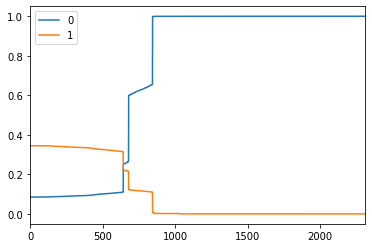

In [164]:
pd.DataFrame(predict_blue).plot()

In [165]:
predict_blue = pd.DataFrame(predict_blue)
predict_red = predict_blue[1]
predict_blue = predict_blue[0]

In [169]:
predict_blue

0       0.085331
1       0.085331
2       0.085331
3       0.085331
4       0.085331
          ...   
2305    1.000000
2306    1.000000
2307    1.000000
2308    1.000000
2309    1.000000
Name: 0, Length: 2310, dtype: float32

In [175]:
predict_red

0       0.3451
1       0.3451
2       0.3451
3       0.3451
4       0.3451
         ...  
2305    0.0000
2306    0.0000
2307    0.0000
2308    0.0000
2309    0.0000
Name: 1, Length: 2310, dtype: float32

In [181]:
predict_temp = list(predict_blue)
predict_temp.insert(0,0)
predict_temp.pop(-1)

1.0

In [188]:
predict_blue = abs(np.array(predict_blue)-np.array(predict_temp))

In [190]:
predict_blue[0] = predict_blue[1]

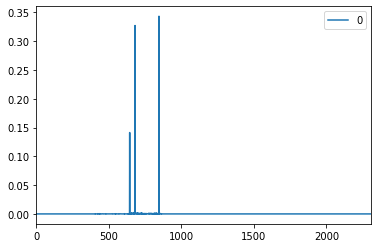

In [194]:
pd.DataFrame(predict_blue).plot()

In [195]:
predict_temp = list(predict_red)
predict_temp.insert(0,0)
predict_temp.pop(-1)

0.0

In [196]:
predict_red = abs(np.array(predict_red)-np.array(predict_temp))

In [197]:
predict_red[0] = predict_red[1]

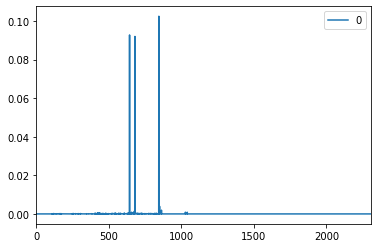

In [198]:
pd.DataFrame(predict_red).plot()

In [199]:
predict_delta = predict_blue+predict_red

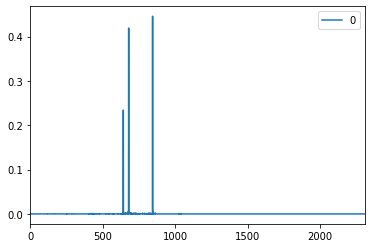

In [201]:
pd.DataFrame(predict_delta).plot()

In [206]:
highlight = []
for i,v in enumerate(predict_delta):
    if v>0.005:
        highlight.append(i)

In [207]:
highlight

[643, 677, 680, 681, 845, 850]

In [211]:
for i in highlight:
    print(i//60, i%60)

10 43
11 17
11 20
11 21
14 5
14 10
